In [247]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import *

In [248]:
# importing csv
city_df = pd.read_csv("raw_data\city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")
# merging two dfs for easier use
data = city_df.merge(ride_df, on="city")
data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [249]:
city_groups = data.groupby(["city"])
# Making 
cities_rides_data = pd.DataFrame()
for city, info in city_groups:
    city_ride_data = pd.DataFrame({
        
        "Average Fare": [info["fare"].mean()], 
        "Total number of rides": [info["ride_id"].count()],
        "Total numbers of driver":[info["driver_count"].values[0]],
        "City types" : [info["type"].values[0]],
        "Total Fare" : [info["fare"].sum()]
        
    })
    cities_rides_data= cities_rides_data.append(city_ride_data)
print (cities_rides_data.head())

   Average Fare City types  Total Fare  Total number of rides  \
0     23.928710      Urban      741.79                     31   
0     20.609615      Urban      535.85                     26   
0     37.315556   Suburban      335.84                      9   
0     23.625000      Urban      519.75                     22   
0     21.981579      Urban      417.65                     19   

   Total numbers of driver  
0                       21  
0                       67  
0                       16  
0                       21  
0                       49  


In [250]:
#grouping through city types
urban_df = cities_rides_data.loc[cities_rides_data["City types"] == "Urban"]
suburban_df = cities_rides_data.loc[cities_rides_data["City types"] == "Suburban"]
rural_df = cities_rides_data.loc[cities_rides_data["City types"] == "Rural"]
urban_df.head()

,Average Fare,City types,Total Fare,Total number of rides,Total numbers of driver
0,23.928710,Urban,741.79,31,21
0,20.609615,Urban,535.85,26,67
0,23.625000,Urban,519.75,22,21
0,21.981579,Urban,417.65,19,49
0,25.106452,Urban,778.30,31,41


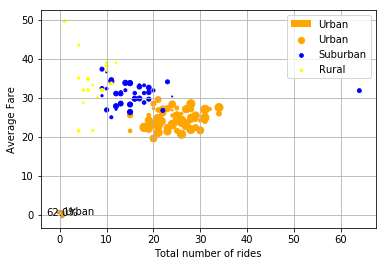

In [251]:
# cities_rides_data.plot.scatter(x="Total number of rides", y= "Average Fare",color=["orange", "blue", "yellow"], s=cities_rides_data["Total numbers of driver"], label=["City types"])
# suburban_df.plot.scatter(x="Total number of rides", y= "Average Fare",color="blue", s=cities_rides_data["Total numbers of driver"], label="Suburban")
# rural_df.plot.scatter(x="Total number of rides", y= "Average Fare",color="yellow", s=cities_rides_data["Total numbers of driver"], label="Rural")

plt.scatter(urban_df["Total number of rides"], urban_df["Average Fare"], color="orange",s=urban_df["Total numbers of driver"], label="Urban")
plt.scatter(suburban_df["Total number of rides"], suburban_df["Average Fare"], color="blue", s=suburban_df["Total numbers of driver"], label="Suburban")
plt.scatter(rural_df["Total number of rides"], rural_df["Average Fare"], color="yellow", s=rural_df["Total numbers of driver"], label="Rural")

plt.xlabel("Total number of rides")
plt.ylabel("Average Fare")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

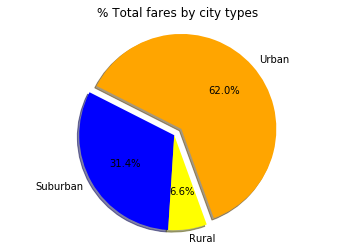

In [252]:
# % of Total Fares by City Type
total_fares = [urban_df["Total Fare"].sum(), suburban_df["Total Fare"].sum(), rural_df["Total Fare"].sum()]
explode = [0.1, 0, 0]
plt.pie(total_fares, labels=["Urban", "Suburban", "Rural"], 
        colors=["orange", "blue", "yellow"], autopct="%1.1f%%", shadow=True, explode=explode, startangle=290)
plt.title("% Total fares by city types")
plt.axis("equal")
plt.show()

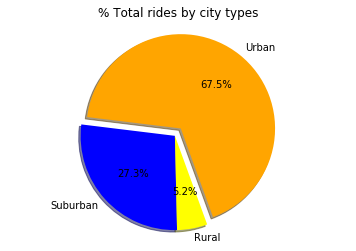

In [253]:
# of Total rides by City Type
total_rides = [urban_df["Total number of rides"].sum(), suburban_df["Total number of rides"].sum(), rural_df["Total number of rides"].sum()]
explode = [0.1, 0, 0]
plt.pie(total_rides, labels=["Urban", "Suburban", "Rural"], 
        colors=["orange", "blue", "yellow"], autopct="%1.1f%%", shadow=True, explode=explode, startangle=290)
plt.title("% Total rides by city types")
plt.axis("equal")
plt.show()

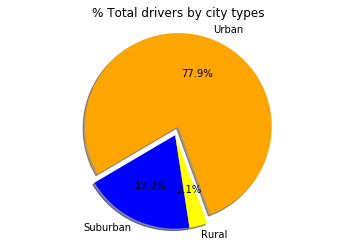

In [254]:
#Total drivers by city types
total_drivers = [urban_df["Total numbers of driver"].sum(), suburban_df["Total numbers of driver"].sum(), rural_df["Total numbers of driver"].sum()]
explode = [0.1, 0, 0]
plt.pie(total_drivers, labels=["Urban", "Suburban", "Rural"], 
        colors=["orange", "blue", "yellow"], autopct="%1.1f%%", shadow=True, explode=explode, startangle=290)
plt.title("% Total drivers by city types")
plt.axis("equal")
plt.show()